<a href="https://colab.research.google.com/github/elizleon/PLN/blob/main/TallerPlenariaMINTIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Practica Análisis de Texto</h1>
<center><h1>Plenaria MINTIC</h1>
<center><h1>2021</h1>
<strong>Ciclo 1 </strong><br />
PROFESORA ELIZABETH LEON GUZMAN <br />


El objetivo de esta practica es programar en python algunos componentes para realizar análisis de datos textuales usando librerías como nltk, pandas, re, matplotlib y sclearn.

##  **Corpus (conjunto de Datos)**
Construiremos un text corpus sencillo sobre el cual demostraremos las diferentes metodologías y modelos de extracción de características.

In [1]:
# Importamos librerías
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt

In [35]:
# Creamos un corpus
corpus = ['El cielo esta azul y hermoso.',
'Me gusta el día de hoy, ¡soleado y cielo azul y hermoso!',
'El zorro marrón rápido salta sobre le perro perezoso.',
'El desayuno del rey tiene frutas. Tncluye fresas, uvas, y jugo de naranja',
'¡Me gusta la ensalada de frutas en epecial que tenga mango, fresas y uvas!',
'¡El zorro marrón es rápido y el perro azul es perezoso!',
'El cielo esta muy azul y el cielo es muy hermoso hoy',
'¡El perro es perezoso pero el zorro marrón es rápido!'
]

In [36]:
# Asignamos un label para cada frase (documento) 
labels = ['clima', 'clima', 'animales', 'comida', 'comida', 'animales', 'clima', 'animales']

In [ ]:
# Convertimos el corpus a un Pandas dataframe
corpus = np.array(corpus)
corpus_df = pd.DataFrame({"Documento": corpus, "Categoria": labels})
corpus_df

##  **Preprocesamiento (Noramlización del Texto)**

Antes de extraer características debemos preprocesar el texto, eliminado los caracteres innecesarios, los signos de puntuación, los stop words, tokenizar, etc.  

In [ ]:
# Popular corpus y clases
nltk.download("popular")

In [39]:
#Creación de una función para realizar las tareas de normalización
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('spanish')
def normalize_document(doc):
  # deaj en minúscula y remueve caracteres especiales y espacios en blanco
  #doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
  doc = re.sub(r'[^a-zA-Záéíóú\s]', '', doc, re.I|re.A)
  doc = doc.lower()
  doc = doc.strip()
  # tokenize document
  tokens = wpt.tokenize(doc)
  # filter stopwords out of document
  filtered_tokens = [token for token in tokens if token not in stop_words]
  # re-create document from filtered tokens
  doc = ' '.join(filtered_tokens)
  return doc

In [40]:
# Vectorizamos la función de extracción de características
normalize_corpus = np.vectorize(normalize_document)

In [ ]:
# Normalizamos el corpus
norm_corpus = normalize_corpus(corpus)
norm_corpus

## **2. Representación del texto**

In [42]:
# Unir todas las palabras
all_words = " ".join(norm_corpus)

In [ ]:
# Calculamos la frecuencia de las palabras
from collections import Counter
c = Counter(all_words.split())
#c(50)
print(c.elements)

In [44]:
#Ordenamos. Podemos seleccionar el número de términos más frecuentes
#sort_words = dict(c.most_common())
sort_words = dict(c.most_common(300))

2.1 Gráfica de Frecuencia de palabras

In [45]:
#Extraemos las etiquetas y los valores por separado
x_val = sort_words.values()
x_label = sort_words.keys()

In [ ]:
#Dibuja la Frecuencia de la palabras de mayor a menor (distribución de las frecuencias)
#plt.figure(figsize=(20,5))
plt.figure(figsize=(30,3))
plt.bar(x_label, x_val)
plt.xlabel("Palabra"); plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
#plt.title("Análisis de frecuencias de palabras en ¿Cuál es tu visión a futuro?")
#plt.savefig('vision.png')
#plt.title("Análisis de frecuencias de palabras en ¿Por qué desea hacer parte del programa?")
#plt.savefig('programa.png')
plt.show()



```
# This is formatted as code
```

### 2.2. Nube de palabras

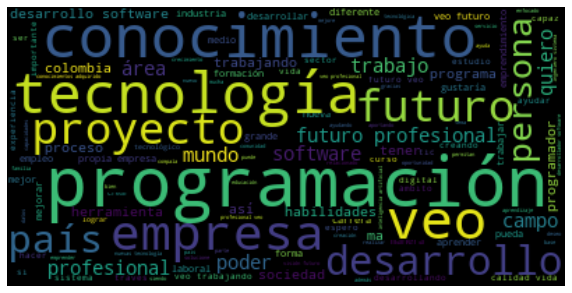

In [23]:
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
# Creamos la nube de palabras
im = WordCloud().generate(all_words)
# Visualizamos la nube de palabras
plt.imshow(im, interpolation="bilinear")
plt.axis("off")
#plt.savefig('nubeVision.png')
#plt.savefig('nubePrograma.png')
plt.show()

###Leyendo de Archivo


In [ ]:
import pandas as pd
comentarios = pd.read_excel("mintic_2.xlsx")
corpus1 = comentarios['¿Cuál es tu visión a futuro?']
print(corpus1.head(5))
corpus2 = comentarios['¿Por qué desea hacer parte del programa?']
print(corpus2.head(5))
#corpus = corpus1 + corpus2

In [25]:
import nltk
stop_words=nltk.corpus.stopwords.words("spanish")

In [ ]:
# Normalizamos el corpus
norm_corpus = normalize_corpus(corpus1)
norm_corpus

##**Clasificación de documentos**

Construcción de un modelo de clasificación usando "NaiveBayes" para predecir el tema de los documentos.

### Bolsa de Palabras - Bag of Words (Bow)

Es el modelo de representación vectorial más simple, representa cada documento en el corpus como un vector numérico donde cada dimensión es una palabra especifica en el corpus y el valor es puede ser:
*i)* un conteo de frecuencia de la palabra en el documento, 
*ii)* la ocurrencia o no de la palabra en el documento (0 si la palabra no se encuentra en el documento; 1 en otro caso), 
*iii)* incluso pueden ser valores de pesados. 

Este modelo no toma en cuenta la secuencia de palabras, gramática o semántica.

In [46]:
# Importamos el extractor de características BoW de Scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Instanciamos el extractor de características para la ocurrencia de palabras
cv = CountVectorizer(min_df=0., max_df=1.)
# Extraemos las características del corpus 
cv_matrix = cv.fit_transform(norm_corpus)
# El resultado es una matriz sparse
cv_matrix

El resultado es una matriz dispersa porque el número de palabras puede incrementarse de manera exponencial con cada nuevo documento, pues cada palabra distinta se convierte en una nueva característica. El resultado previo muestra los pares (x,y) de la matriz de características que son distintos de cero, donde x representa a un documento y y representa un termino en el corpus.



In [ ]:
# Convertimos de la representación sparse a la densa para visualizarla como numpy array
cv_matrix = cv_matrix.toarray()
cv_matrix

In [ ]:
# Obtenemos todas las palabras diferentes en el corpus
vocab = cv.get_feature_names()
# Mostramos el documento y las features
pd.DataFrame(cv_matrix, columns=vocab)

tf-idf **term frequency-inverse document frequency**, es la combinación de  la frecuencia del término (tf) y la inversa de la frecuencia del documento (idf). 

$$tfidf=tf \times idf$$

In [50]:
# Importamos el extractor de características tf-idf de scikit-learn 
from sklearn.feature_extraction.text import TfidfTransformer

In [51]:
# Creamos el objeto tf-idf transformer y extraemos las características del corpus 
tt = TfidfTransformer(norm="l2", use_idf=True)
# Obtenemos la matrix tf-idf del modelo BoW 
tt_matrix = tt.fit_transform(cv_matrix)

In [ ]:
# Visualizamos la matrix tf-idf
tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names()
data = pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)
data

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train)
print(X_test)
print(Y_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
GNB = GaussianNB()
GNB.fit(X_train, Y_train)

In [ ]:
Y_pred = GNB.predict(X_test)
print(Y_pred)
accuracy_score(Y_test,Y_pred)